# Type C Models Expect Filter_str and Denamed

In [21]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [22]:
data = pandas.read_csv("../Dataset/final.csv")
data.head()


,filter_str,denamed,ipHash,port,whereDetected,regexDetected,emptyFilter,nullArgument,label
0,"{'user': '{}', 'password': '{}'}","{'name': '{}', 'name': '{}'}",2130706433,47038,0,0,0,1,0.0
1,"{'user': '{}', 'password': '{}'}","{'name': '{}', 'name': '{}'}",2130706433,47038,0,0,0,1,0.0
2,{'username': {'$regex': '^{}'}},{'name': {'$regex': '^{}'}},2130706433,47038,0,1,0,1,1.0
3,{'username': {'$regex': '^{}'}},{'name': {'$regex': '^{}'}},2130706433,47038,0,1,0,1,1.0
4,{'username': {'$ne': '{}'}},{'name': {'$ne': '{}'}},2130706433,47038,0,0,0,1,1.0


In [23]:
features = data[data.columns.difference(['label','denamed','filter_str'])]
target = data['label']
features.head()

,emptyFilter,ipHash,nullArgument,port,regexDetected,whereDetected
0,0,2130706433,1,47038,0,0
1,0,2130706433,1,47038,0,0
2,0,2130706433,1,47038,1,0
3,0,2130706433,1,47038,1,0
4,0,2130706433,1,47038,0,0


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
vectorizer = TfidfVectorizer()

scaler = StandardScaler()
X = data[['ipHash','port','emptyFilter','regexDetected','whereDetected','nullArgument']].values
featuresConcat = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_trainS, X_testS, y_trainS, y_testS = train_test_split(featuresConcat, target, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(featuresConcat, target, test_size=0.2)

In [26]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)

In [27]:
svm_A_liner.fit(X_trainS,y_trainS)
svm_A_poly.fit(X_trainS,y_trainS)
svm_A_rbf.fit(X_trainS,y_trainS)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)

[LibSVM]*
optimization finished, #iter = 112
obj = -158.488507, rho = -0.439268
nSV = 163, nBSV = 157
Total nSV = 163
[LibSVM]*
optimization finished, #iter = 97
obj = -158.801487, rho = -0.990910
nSV = 162, nBSV = 157
Total nSV = 162
[LibSVM]*
optimization finished, #iter = 94
obj = -160.964622, rho = 0.409291
nSV = 167, nBSV = 158
Total nSV = 167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32391D+02    |proj g|=  1.24105D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


        20           1.3151            0.06s
        30           1.3100            0.05s
        40           1.3079            0.05s
        50           1.3071            0.04s
        60           1.3067            0.04s
        70           1.3066            0.03s
        80           1.3065            0.02s
        90           1.3064            0.01s
       100           1.3064            0.00s


KNeighborsClassifier(n_neighbors=7)

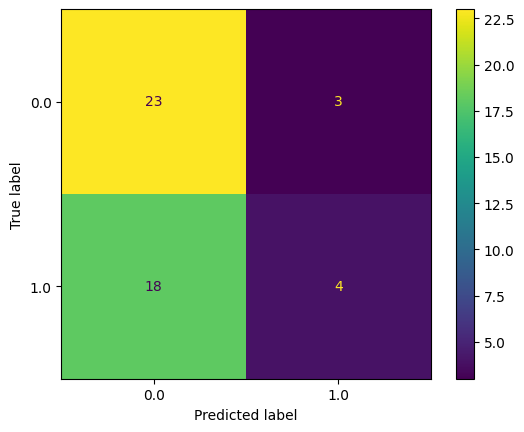

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.56      0.88      0.69        26
         1.0       0.57      0.18      0.28        22

    accuracy                           0.56        48
   macro avg       0.57      0.53      0.48        48
weighted avg       0.57      0.56      0.50        48



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


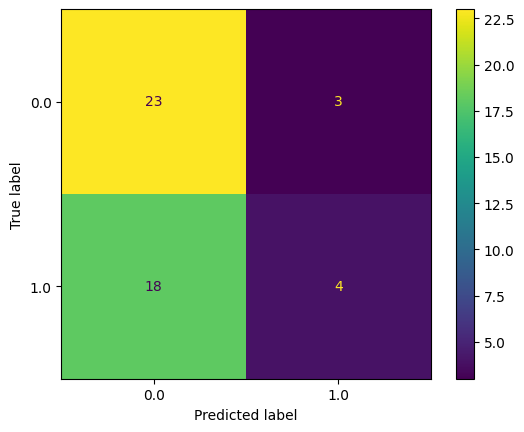

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.56      0.88      0.69        26
         1.0       0.57      0.18      0.28        22

    accuracy                           0.56        48
   macro avg       0.57      0.53      0.48        48
weighted avg       0.57      0.56      0.50        48



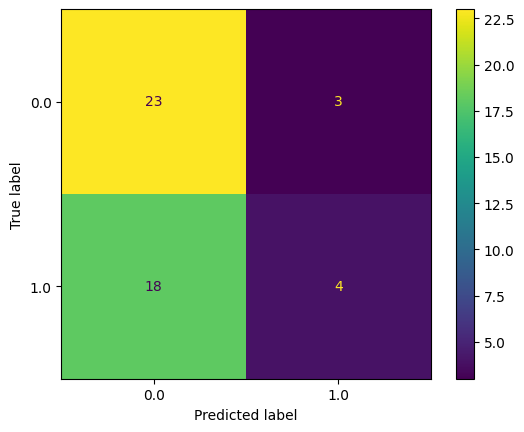

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.56      0.88      0.69        26
         1.0       0.57      0.18      0.28        22

    accuracy                           0.56        48
   macro avg       0.57      0.53      0.48        48
weighted avg       0.57      0.56      0.50        48



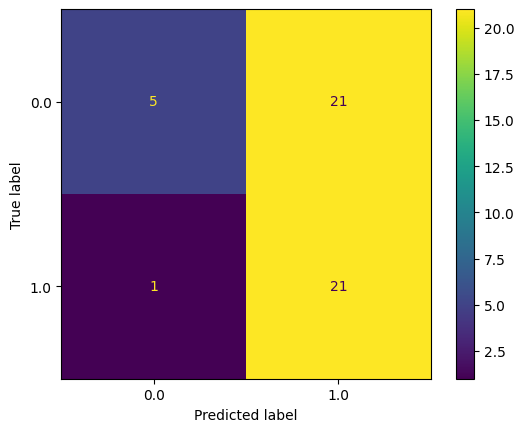

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.83      0.19      0.31        26
         1.0       0.50      0.95      0.66        22

    accuracy                           0.54        48
   macro avg       0.67      0.57      0.48        48
weighted avg       0.68      0.54      0.47        48



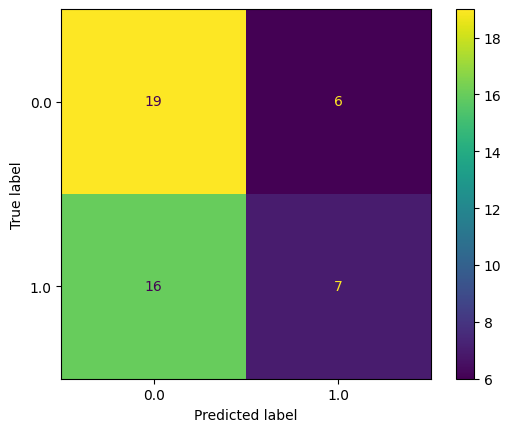

Classification Report for Linear SVM:
              precision    recall  f1-score   support

         0.0       0.54      0.76      0.63        25
         1.0       0.54      0.30      0.39        23

    accuracy                           0.54        48
   macro avg       0.54      0.53      0.51        48
weighted avg       0.54      0.54      0.52        48



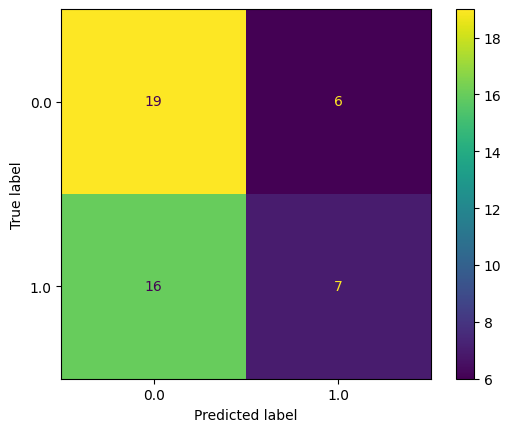

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.54      0.76      0.63        25
         1.0       0.54      0.30      0.39        23

    accuracy                           0.54        48
   macro avg       0.54      0.53      0.51        48
weighted avg       0.54      0.54      0.52        48



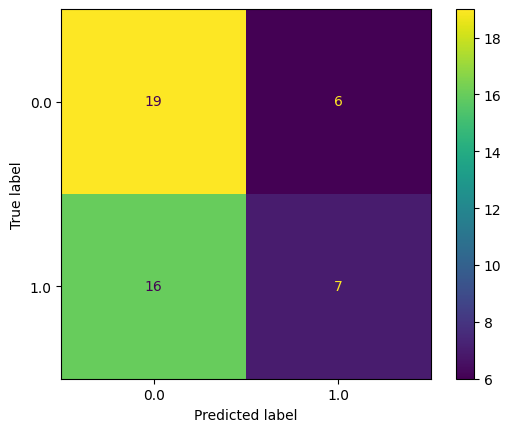

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.54      0.76      0.63        25
         1.0       0.54      0.30      0.39        23

    accuracy                           0.54        48
   macro avg       0.54      0.53      0.51        48
weighted avg       0.54      0.54      0.52        48



In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

modelsScaled = {
    "Linear SVM": svm_A_liner,
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf
}

models = {
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN": knn
}

metrics_list = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    ps = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})
    
for name, model in modelsScaled.items():
    y_pred = model.predict(X_testS)
    acc = accuracy_score(y_testS,y_pred)
    ps = precision_score(y_testS,y_pred)
    recall = recall_score(y_testS,y_pred)
    f1 = f1_score(y_testS, y_pred)
    cm = confusion_matrix(y_testS, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    report = classification_report(y_testS, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})


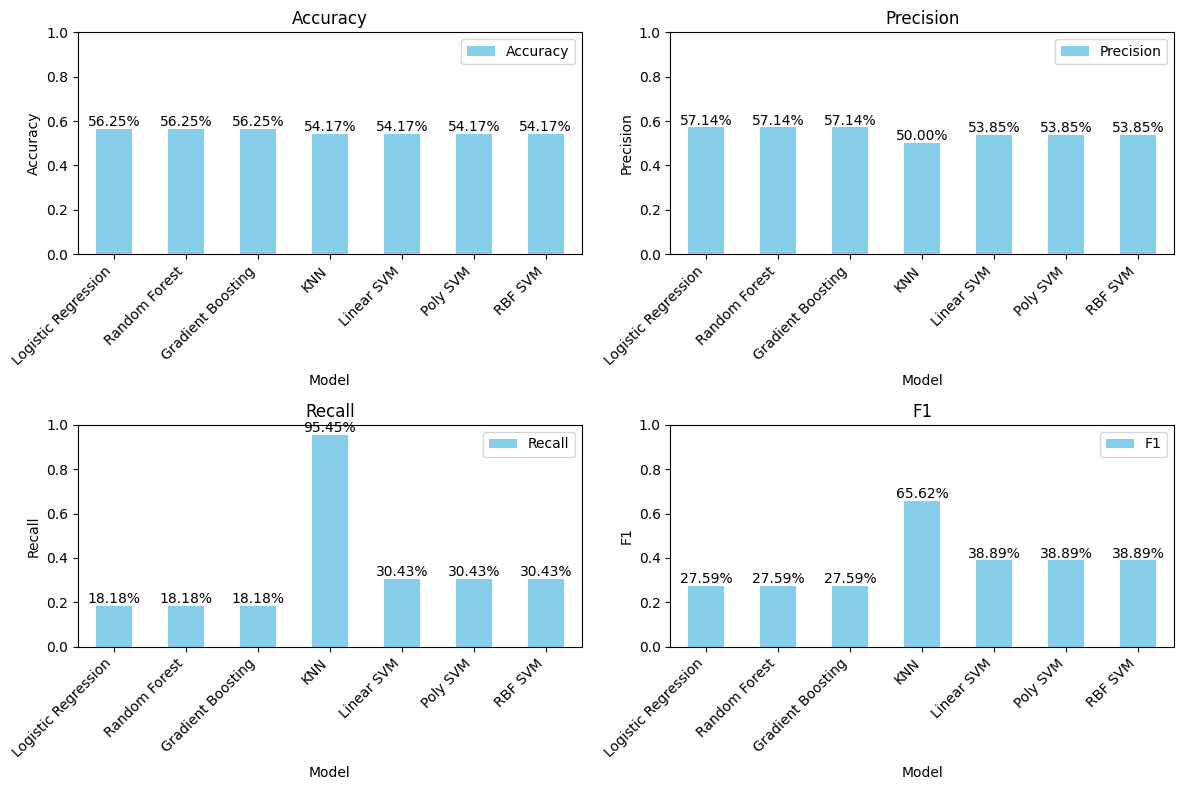

In [32]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

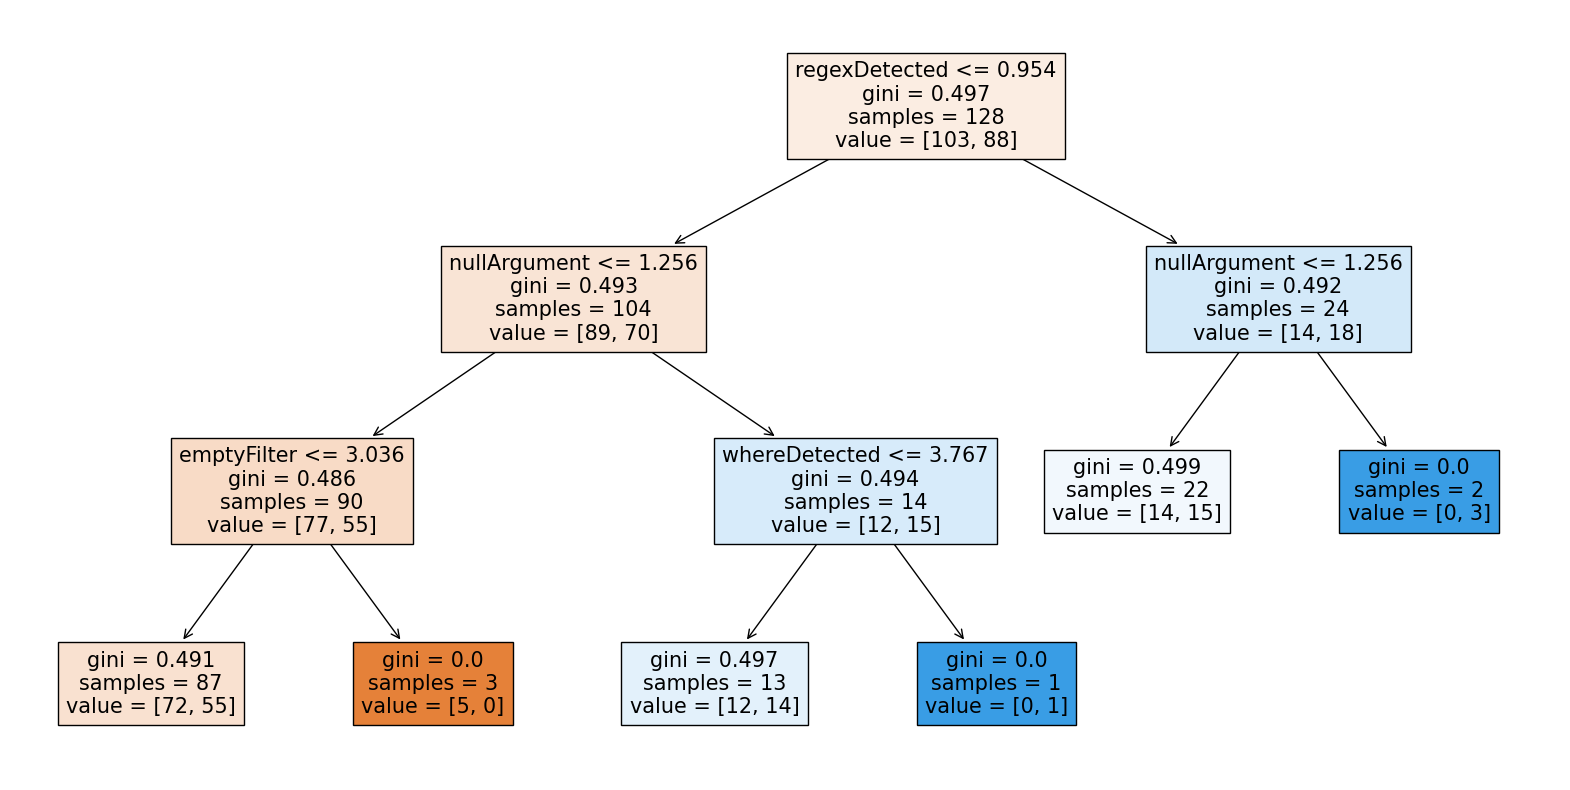

In [30]:
from sklearn.tree import plot_tree
feature_names = ['ipHash', 'port', 'emptyFilter', 'regexDetected', 'whereDetected', 'nullArgument']
plt.figure(figsize=(20, 10))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=[feature_names[i] for i in range(featuresConcat.shape[1])])
plt.show()